In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv('HR-Employee-Attrition.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


# Data Cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [5]:
df.duplicated().sum()

0

# Exploration

In [6]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [7]:
df.sample(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
938,58,No,Travel_Rarely,848,Research & Development,23,4,Life Sciences,1,1308,...,4,80,2,2,3,3,2,2,2,2
499,33,No,Travel_Rarely,1216,Sales,8,4,Marketing,1,677,...,4,80,0,6,3,3,5,0,1,2
221,33,No,Travel_Rarely,147,Research & Development,4,4,Medical,1,305,...,4,80,0,7,3,3,3,2,1,1
1292,39,No,Travel_Frequently,766,Sales,20,3,Life Sciences,1,1812,...,4,80,1,7,6,3,2,1,2,2
902,27,No,Travel_Rarely,1167,Research & Development,4,2,Life Sciences,1,1259,...,2,80,3,5,2,3,5,3,0,3
657,29,No,Travel_Rarely,1086,Research & Development,7,1,Medical,1,912,...,3,80,3,8,5,3,4,3,0,3
737,41,No,Travel_Rarely,549,Research & Development,7,2,Medical,1,1025,...,2,80,0,8,6,3,2,2,2,1
100,37,Yes,Travel_Rarely,807,Human Resources,6,4,Human Resources,1,133,...,4,80,0,7,3,3,3,2,0,2
629,28,No,Travel_Rarely,1169,Human Resources,8,2,Medical,1,869,...,4,80,1,6,6,3,5,1,0,4
474,24,No,Travel_Rarely,691,Research & Development,23,3,Medical,1,639,...,2,80,2,6,3,3,6,5,1,4


In [8]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# Data Visualization

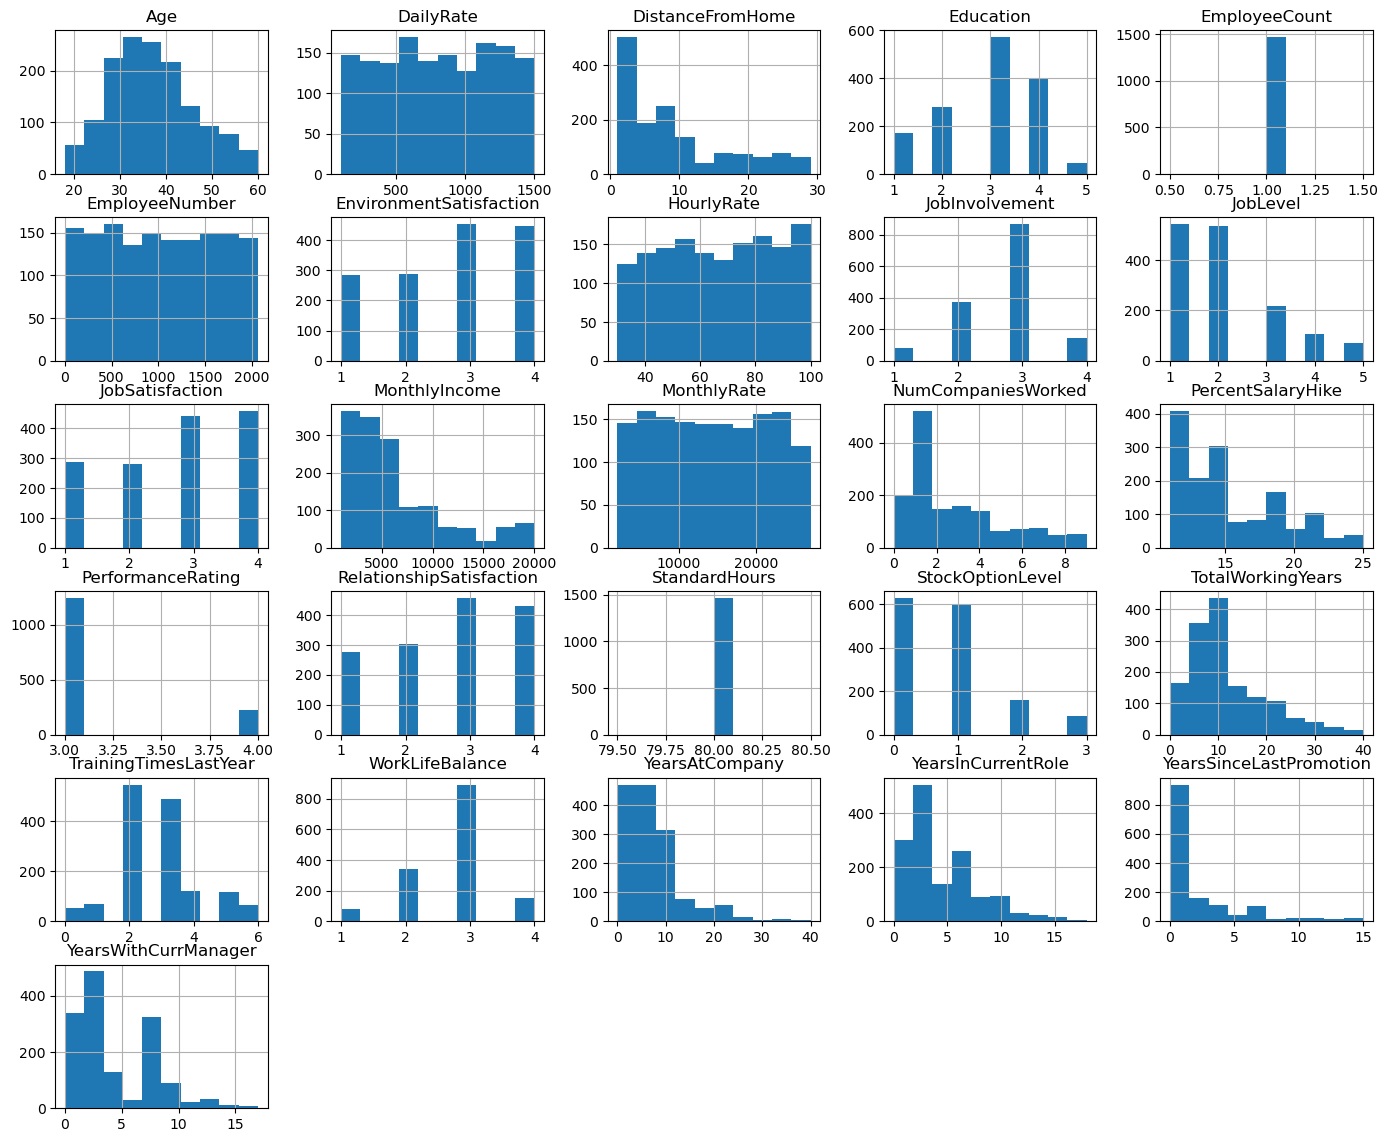

In [9]:
df.hist(figsize=(17,14))
plt.show()

# Coorelation Matrix Heatmap

C:\Users\Sam\AppData\Local\Temp\ipykernel_3496\2481481760.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm').set_title('Coorelation Heatmap')


Text(0.5, 1.0, 'Coorelation Heatmap')

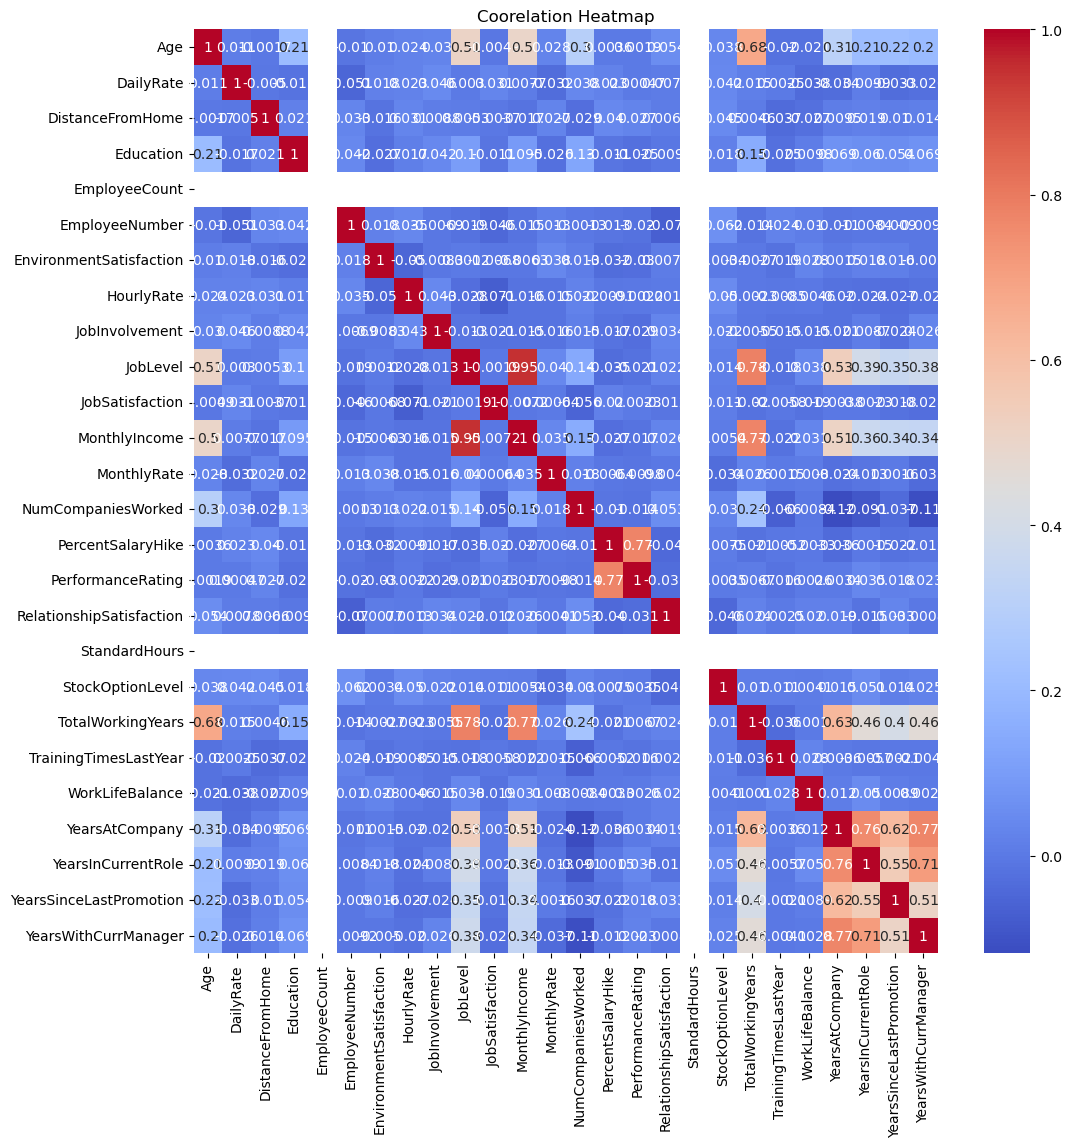

In [10]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm').set_title('Coorelation Heatmap')

<function matplotlib.pyplot.show(close=None, block=None)>

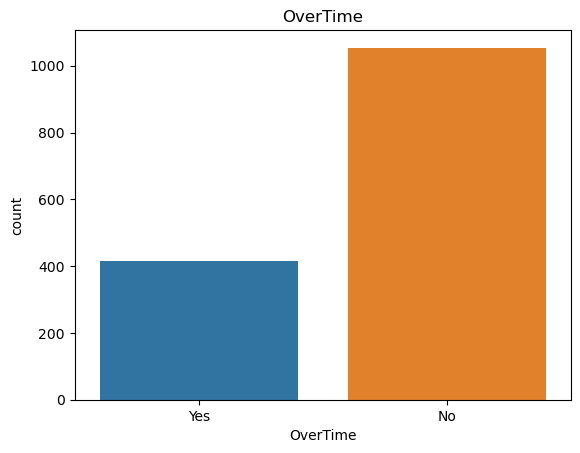

In [11]:
sns.countplot(df, x='OverTime')
plt.title('OverTime')
plt.show

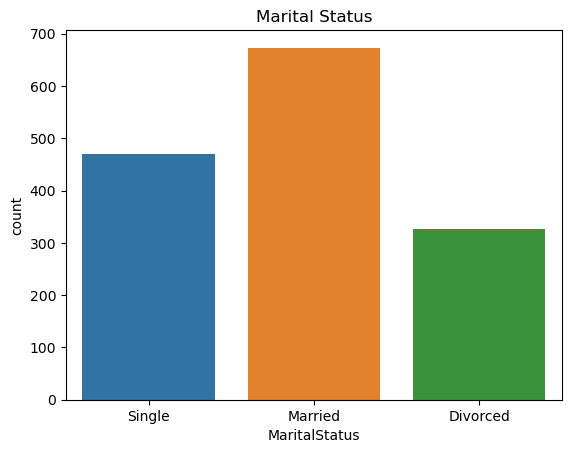

In [12]:
sns.countplot(df, x='MaritalStatus')
plt.title('Marital Status')
plt.show()

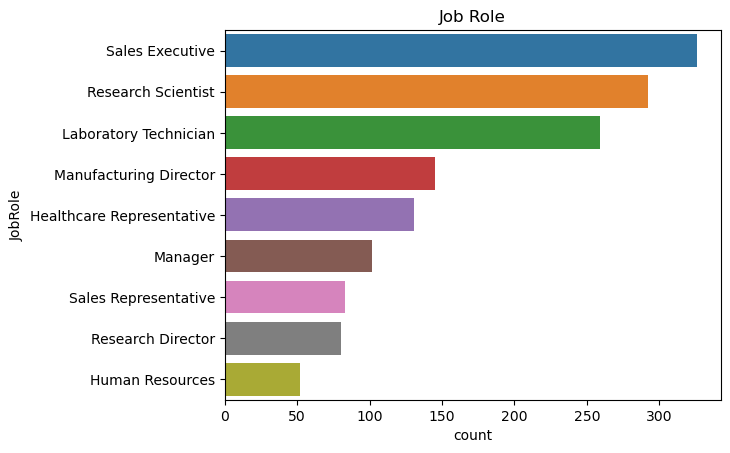

In [13]:
sns.countplot(df, y='JobRole')
plt.title('Job Role')
plt.show()

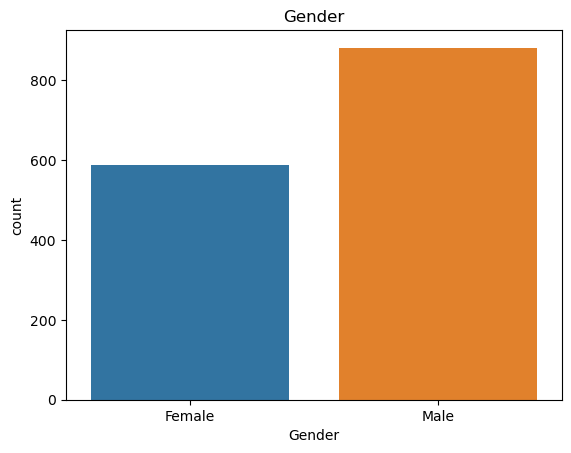

In [14]:
sns.countplot(df, x='Gender')
plt.title('Gender')
plt.show()

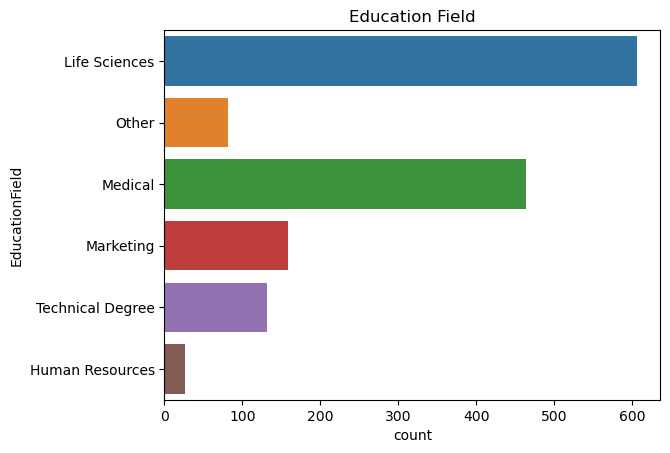

In [15]:
sns.countplot(df, y='EducationField')
plt.title('Education Field')
plt.show()

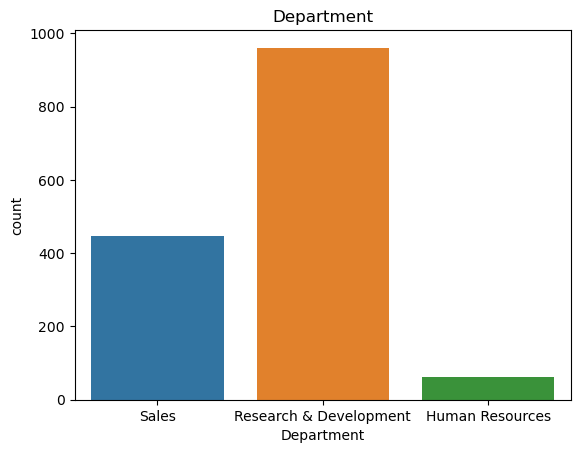

In [16]:
sns.countplot(df, x='Department')
plt.title('Department')
plt.show()

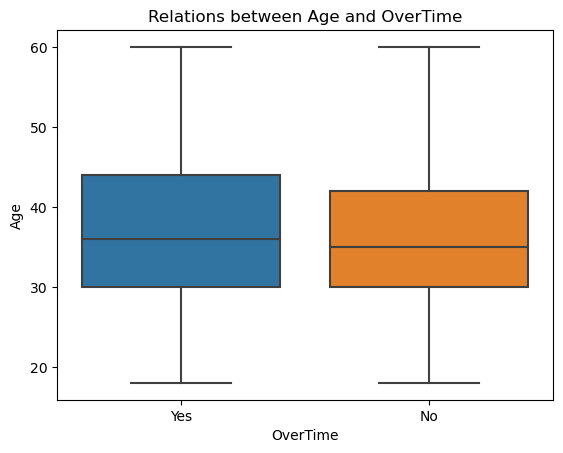

In [17]:
sns.boxplot(df, x= 'OverTime' ,y='Age')
plt.title('Relations between Age and OverTime')
plt.show()

# Plotting Numerical Values

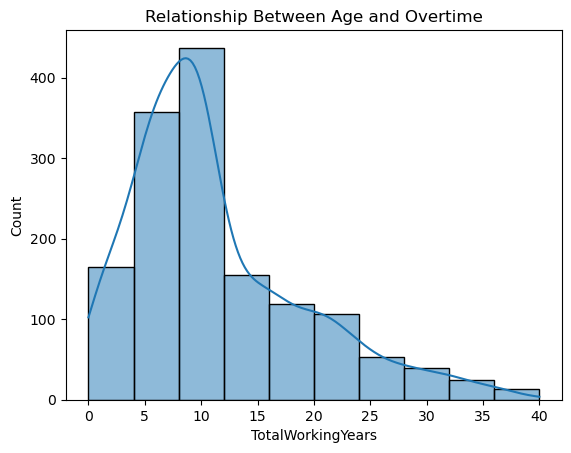

In [18]:
sns.histplot(df, x='TotalWorkingYears',bins = 10,kde=True)
plt.title('Relationship Between Age and Overtime')
plt.show()

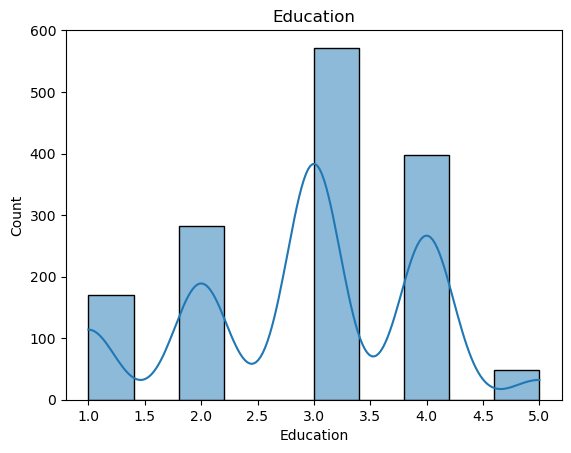

In [19]:
sns.histplot(df, x='Education',bins= 10,kde=True)
plt.title('Education')
plt.show()

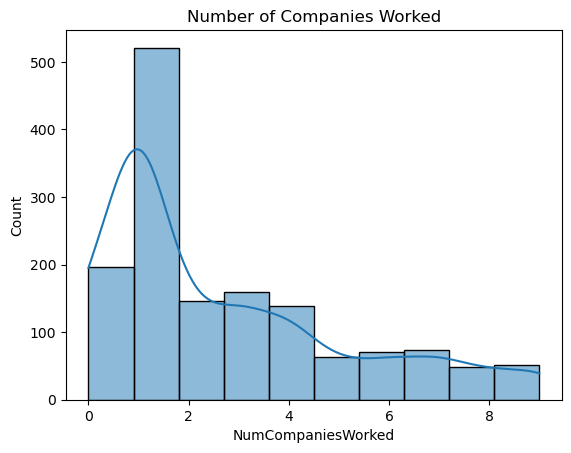

In [20]:
sns.histplot(df, x='NumCompaniesWorked', bins=10,kde=True)
plt.title('Number of Companies Worked')
plt.show()

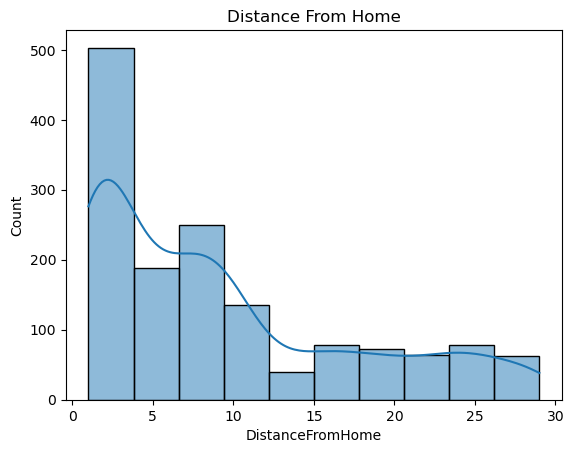

In [21]:
sns.histplot(df, x='DistanceFromHome',bins=10, kde=True)
plt.title('Distance From Home')
plt.show()

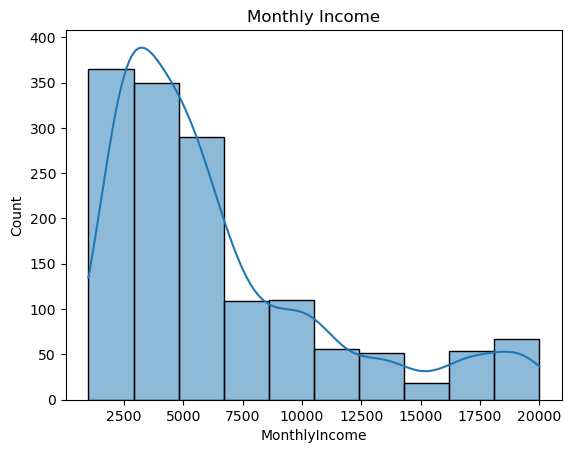

In [22]:
sns.histplot(df, x='MonthlyIncome', bins=10, kde=True)
plt.title('Monthly Income')
plt.show()

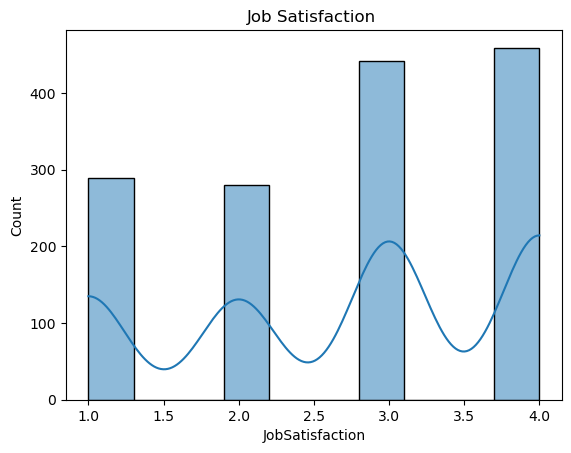

In [23]:
sns.histplot(df, x='JobSatisfaction', bins=10, kde=True)
plt.title('Job Satisfaction ')
plt.show()

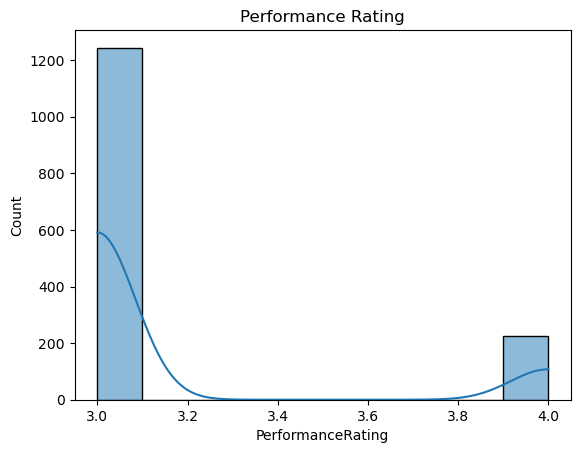

In [24]:
sns.histplot(df, x='PerformanceRating', bins=10,kde=True)
plt.title('Performance Rating')
plt.show()

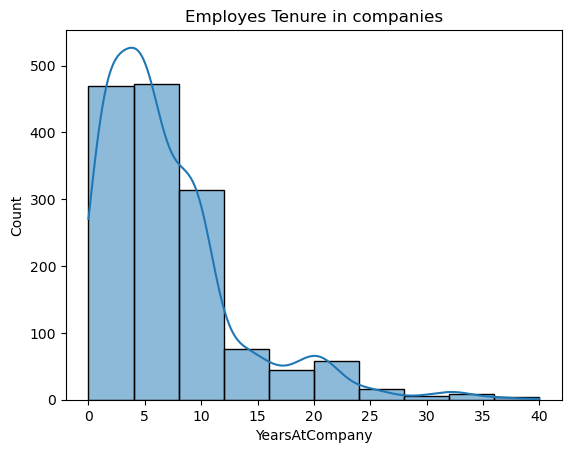

In [25]:
sns.histplot(df, x='YearsAtCompany', bins=10,kde=True)
plt.title('Employes Tenure in companies')
plt.show()

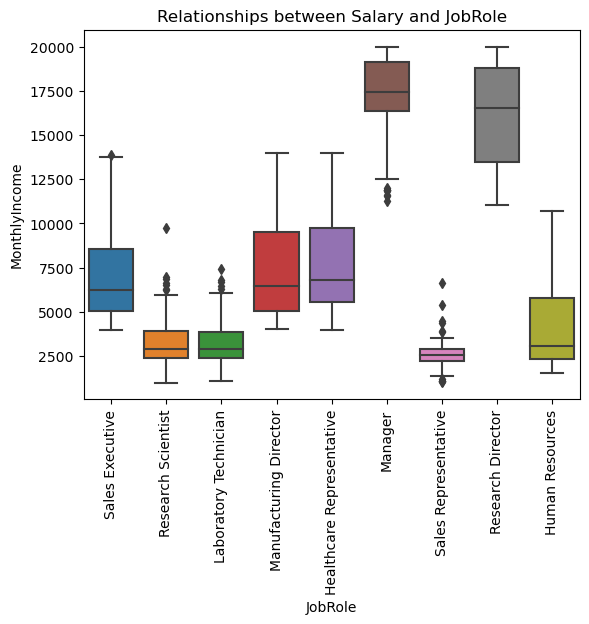

In [26]:
sns.boxplot(df, x= 'JobRole' ,y='MonthlyIncome')
plt.title('Relationships between Salary and JobRole')
plt.xticks(rotation=90)
plt.show()

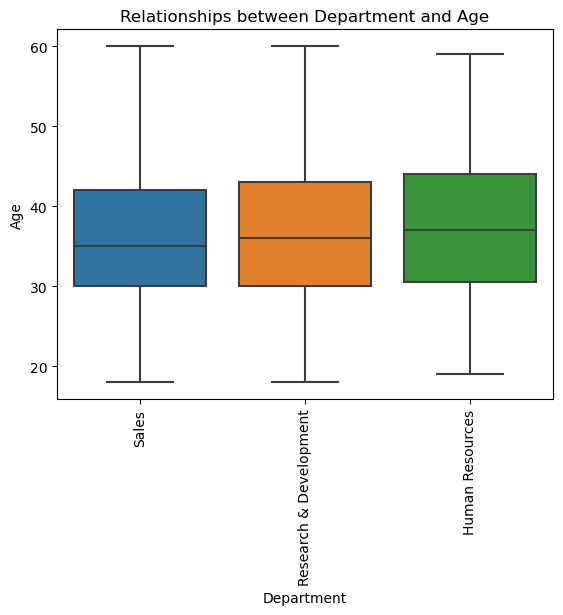

In [27]:
sns.boxplot(df, x= 'Department' ,y='Age')
plt.title('Relationships between Department and Age')
plt.xticks(rotation=90)
plt.show()

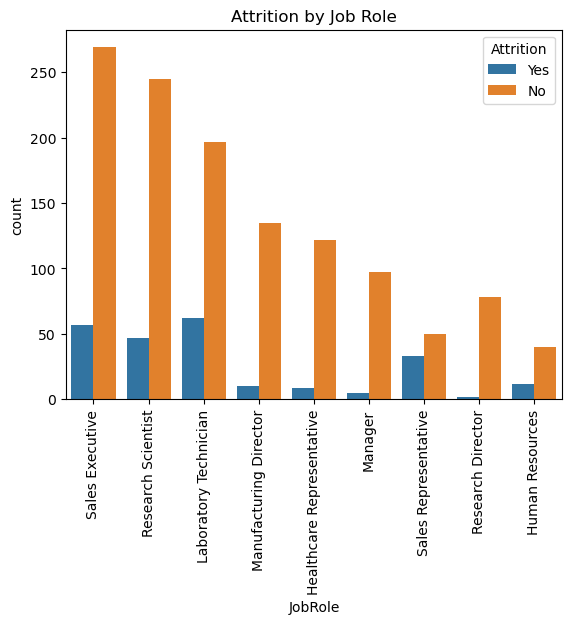

In [28]:
sns.countplot(df, x= 'JobRole', hue= 'Attrition')
plt.title('Attrition by Job Role')
plt.xticks(rotation=90)
plt.show()

In [29]:
df.to_csv('HR-Employee-Attrition.csv')